# Week 9 - 11th October, 2023

1. The csv/data file will be assigned to each group during the lab-class. Using the assigned csv/data file, build a decision classifier model using
   a. Ginni Index and max-depth as 6
   b. Gain-Ratio
   c. Information-Gain.

   For all three splitting methods, measure the  accuracy and plot the decision tree. Find the optimal `max_depth` for both Info-Gain as well as Ginni Index (depth ranging 3..10) using ROC and AUC as scoring criteria. Submit the `ipynb` file (filename as `rollno1_roll2.ipynb`) having code and output for all of the above.
3. Carefully study all three decision trees and report the difference between their performance and internal node selection. Submit the explanation/analysis using `.txt`/`.docx` file.

In [1]:
import pandas as pd

input_df = pd.read_csv('../classification-datasets/HeartEW.csv')

# Modifying the class column so that the values fall in the range of 0-1
input_df.Class = input_df.Class.apply(lambda x: x - 1)

input_df.head(5)

,Class,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,34,1,1,118,182,0,2,174,0,0.0,1,0,3
1,1,53,1,4,140,203,1,2,155,1,3.1,3,0,7
2,1,61,1,1,134,234,0,0,145,0,2.6,2,2,3
3,0,68,1,3,118,277,0,0,151,0,1.0,1,1,7
4,1,54,1,4,122,286,0,2,116,1,3.2,2,2,3


In [2]:
import numpy as np

from sklearn import tree
from sklearn.metrics import accuracy_score

X_features = input_df.drop(['Class'], axis=1).columns
filtered_df = input_df[X_features]

import statsmodels.api as sm

X = sm.add_constant(filtered_df)
Y = input_df.Class

In [3]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [4]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dtree.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=6)

In [5]:
pred_Y = dtree.predict(test_X)
pred_Y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
print(f'Accuracy is {accuracy_score(test_Y, pred_Y) * 100}')

Accuracy is 70.37037037037037


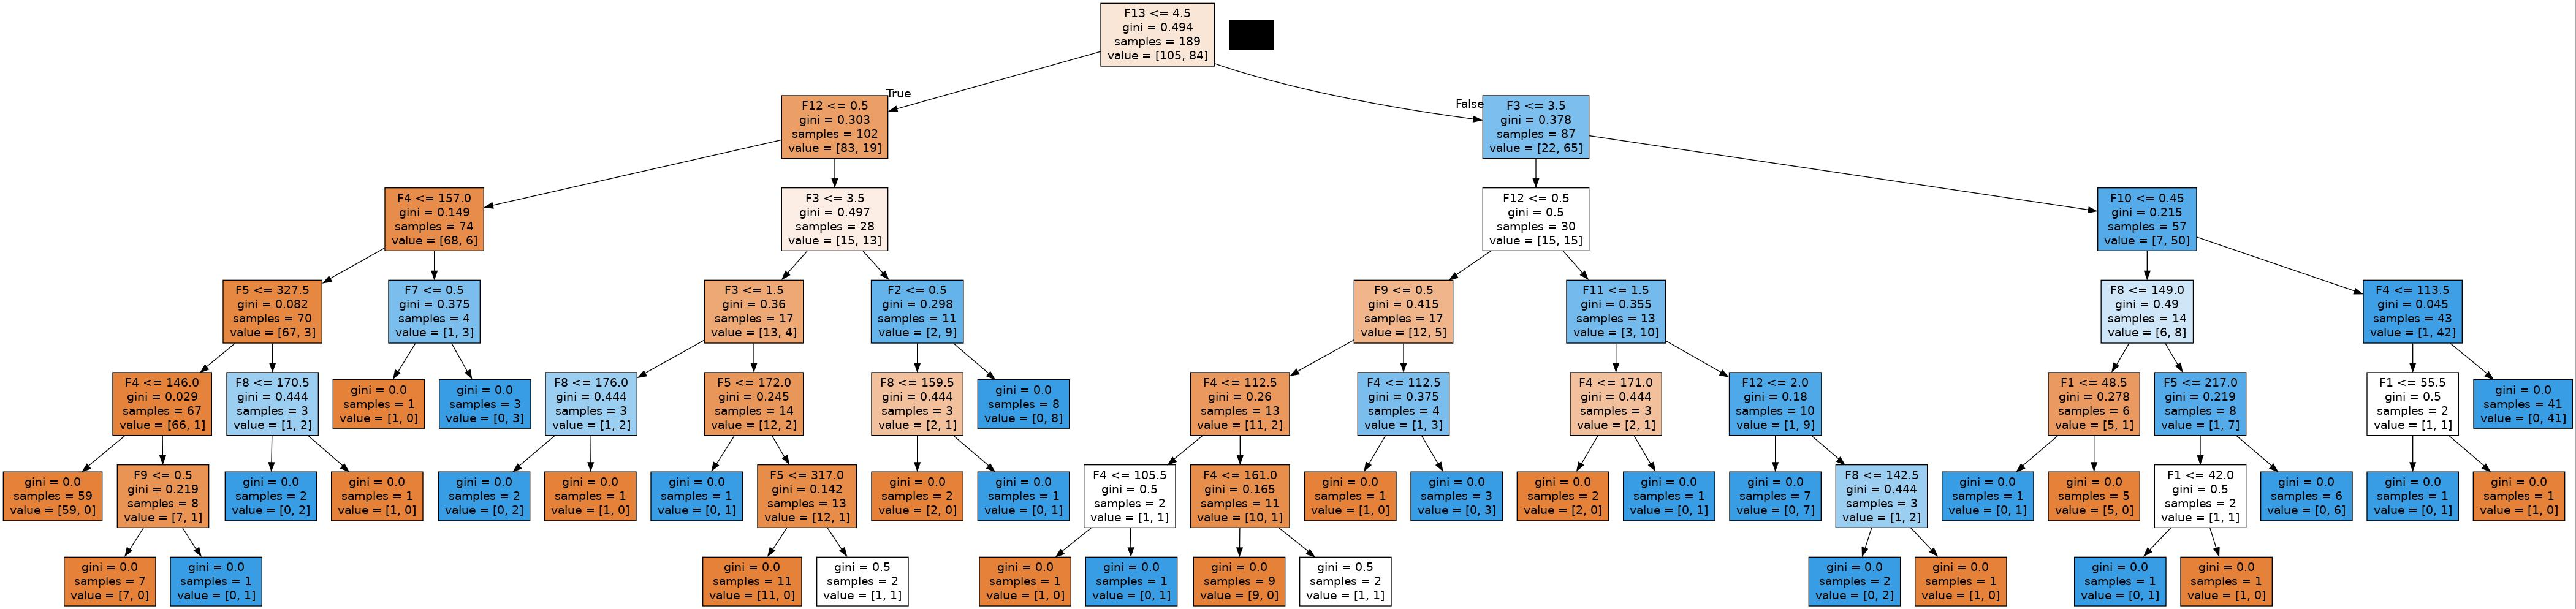

In [8]:
import pydotplus as pdot
from IPython.display import Image

tree.export_graphviz( dtree, out_file = "chd_tree.odt", feature_names = train_X.columns, filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt') 
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename='chd_tree.png')

In [9]:
gini_node_1 = 1 - pow(158/483, 2) - pow (325/483, 2) 
print( round( gini_node_1, 4) )

0.4402


In [15]:
import sklearn.metrics as metrics

tree_predict = dtree.predict(test_X)
auc = metrics.roc_auc_score(test_Y, tree_predict)

accuracy = metrics.accuracy_score(test_Y, tree_predict)
precision = metrics.precision_score(test_Y, tree_predict)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Acuuracy using AUC: {auc}")

Accuracy: 0.7037037037037037
Precision: 0.6764705882352942
Acuuracy using AUC: 0.6972222222222222


In [19]:
dtree_gain = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
dtree_gain.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

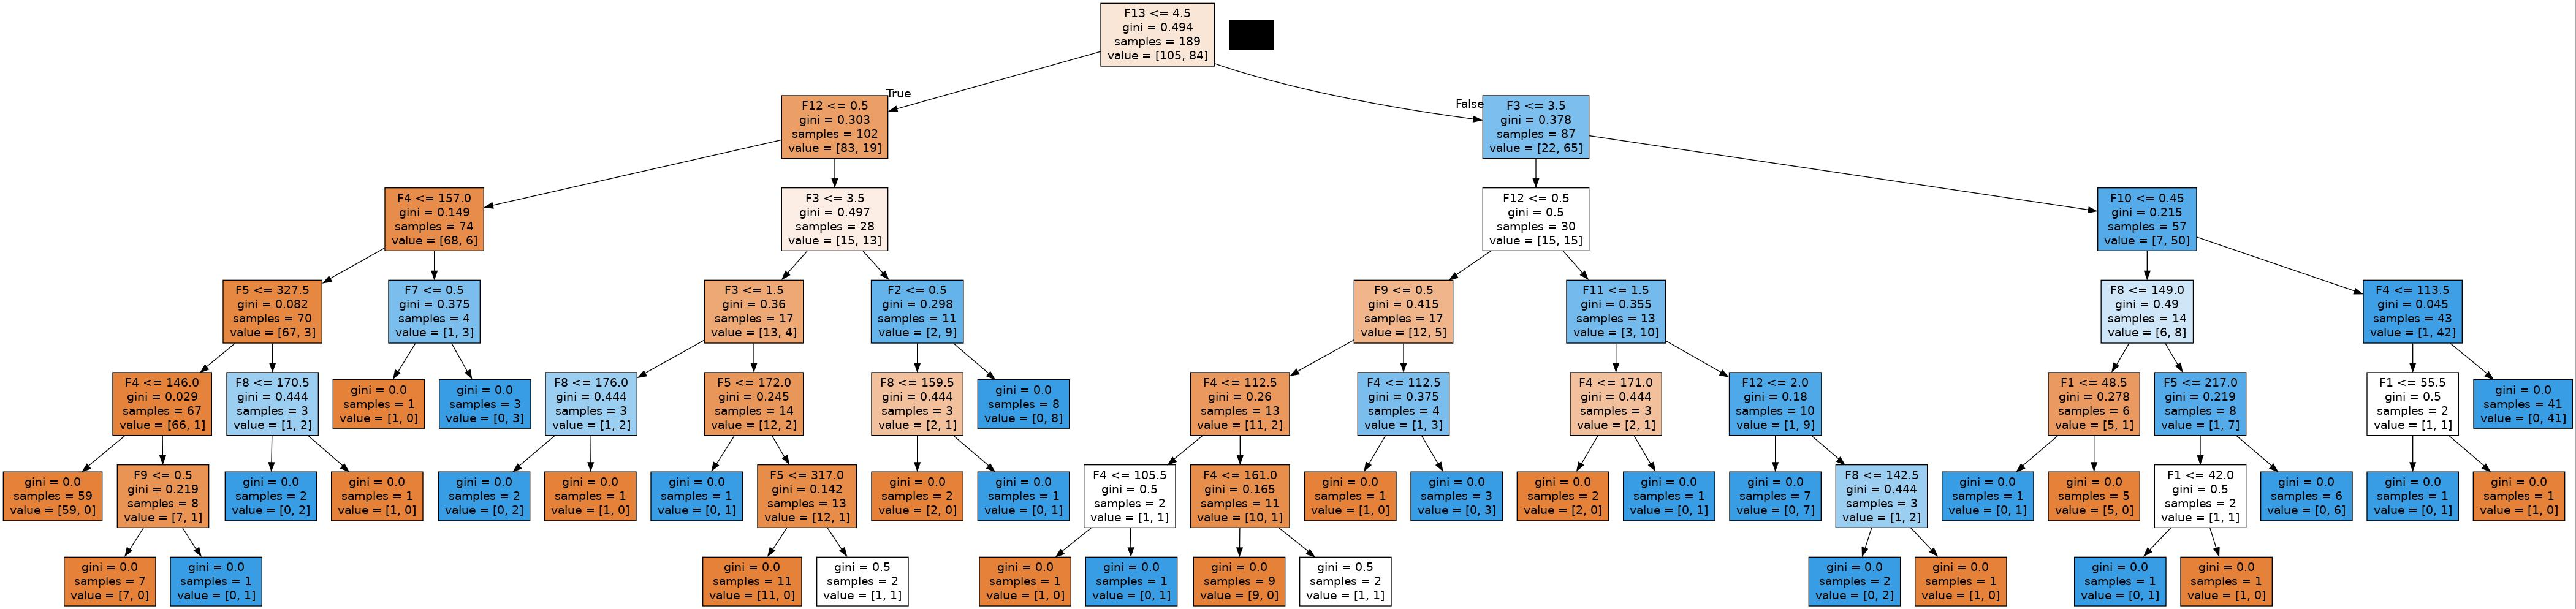

In [21]:
tree.export_graphviz( dtree_gain, out_file = "chd_tree2.odt", feature_names = train_X.columns, filled = True )
chd_tree_graph2 = pdot.graphviz.graph_from_dot_file( 'chd_tree2.odt' ) 
chd_tree_graph.write_jpg( 'chd_tree2.png' )
Image(filename='chd_tree2.png')

In [22]:
import math

entropy_node_1 = - (158/483)*math.log2(325/483) - (325/483)*math.log2(325/483)
print(round( entropy_node_1, 4))

0.5716


In [26]:
tree_predict2 = dtree_gain.predict(test_X) 
auc2 = metrics.roc_auc_score(test_Y, tree_predict2)

accuracy2 = metrics.accuracy_score(test_Y, tree_predict2)
precision2 = metrics.precision_score(test_Y, tree_predict2)
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Acuuracy using AUC: {auc2}")

Accuracy: 0.7407407407407407
Precision: 0.6829268292682927
Acuuracy using AUC: 0.7444444444444445


In [28]:
dtree_info = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
dtree_info.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [33]:
y_pred2 = dtree_info.predict(test_X)

accuracy3 = metrics.accuracy_score(test_Y, y_pred2)
precision3 = metrics.precision_score(test_Y, y_pred2)
auc3 = metrics.roc_auc_score(test_Y, y_pred2)
print(f"Accuracy: {accuracy3}")
print(f"Precision: {precision3}")
print(f"Acuuracy using AUC: {auc3}")

Accuracy: 0.7160493827160493
Precision: 0.6511627906976745
Acuuracy using AUC: 0.7222222222222223


In [38]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(3,10)}]
dtree_final = tree.DecisionTreeClassifier()
clf2 = GridSearchCV(dtree_final,tuned_parameters, cv=10, scoring='roc_auc')
clf2.fit(train_X, train_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 10)}],
             scoring='roc_auc')

In [39]:
clf2.best_score_

0.7872916666666667

In [40]:
clf2.best_params_

{'criterion': 'gini', 'max_depth': 5}